<a href="https://colab.research.google.com/github/Ryo-yuu/Demo/blob/main/DEA113_Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
# Load the Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')

In [50]:
#1.	Calculate the percentage of missing values in each column.
missing_percentage = (titanic.isnull().sum() / len(titanic)) * 100
print("Percentage of Missing Values:\n", missing_percentage)

Percentage of Missing Values:
 survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


In [51]:
#2.	Handle missing values if any are present by either filling or dropping them.
# Handle missing values
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)
titanic.drop(columns=['deck'], inplace=True)
titanic.dropna(subset=['embark_town', 'alive'], inplace=True)

<ipython-input-51-0750fa802286>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
<ipython-input-51-0750fa802286>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [54]:
#3.	Generate summary statistics for both numerical and categorical columns.
print("\nSummary Statistics for Numerical Columns:\n", titanic.describe())
print("\nSummary Statistics for Categorical Columns:\n", titanic.describe(include=['O']))


Summary Statistics for Numerical Columns:
          survived      pclass         age       sibsp       parch        fare
count  889.000000  889.000000  889.000000  889.000000  889.000000  889.000000
mean     0.382452    2.311586   29.315152    0.524184    0.382452   32.096681
std      0.486260    0.834700   12.984932    1.103705    0.806761   49.697504
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.895800
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

Summary Statistics for Categorical Columns:
          sex embarked  who  embark_town alive
count    889      889  889          889   889
unique     2        3    3            3     2
top     male        S  man  Southampton    no
freq     577      644  5

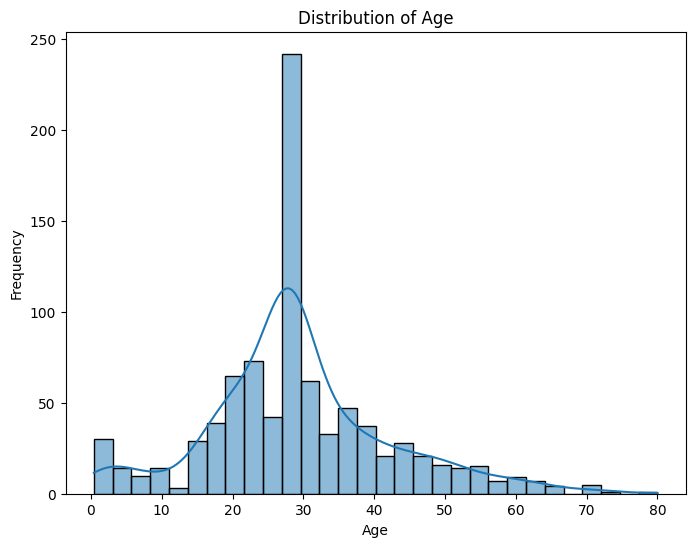

In [55]:
#4.	Plot a histogram to observe the distribution of the age column.
plt.figure(figsize=(8, 6))
sns.histplot(titanic['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

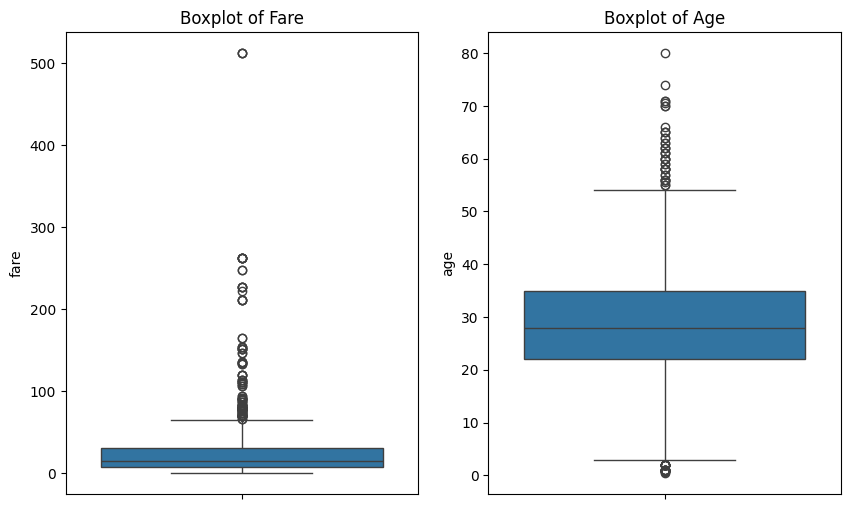

In [56]:
#5. Use a boxplot to identify outliers in the fare and age columns.
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.boxplot(y=titanic['fare'])
plt.title('Boxplot of Fare')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.boxplot(y=titanic['age'])
plt.title('Boxplot of Age')
plt.show()

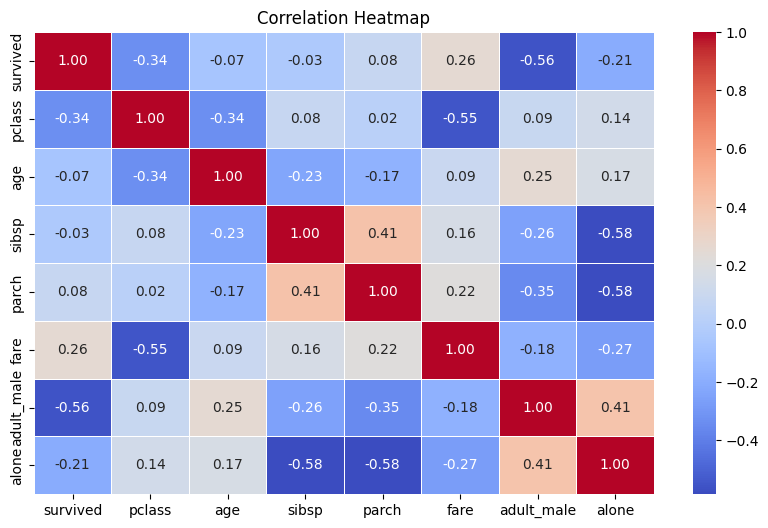

In [57]:
#6.	Calculate and visualize the correlation between numerical columns using a heatmap.
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

<ipython-input-58-2d21624c5e47>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_fare_per_class = titanic.groupby('class')['fare'].mean()
<ipython-input-58-2d21624c5e47>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_fare_per_class.index, y=avg_fare_per_class.values, palette="viridis")


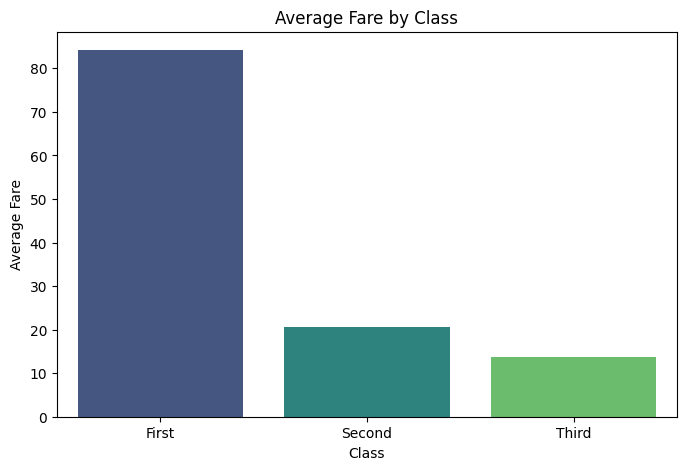

In [58]:
#7.	Find the average fare for each class and compare across categories.
avg_fare_per_class = titanic.groupby('class')['fare'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_fare_per_class.index, y=avg_fare_per_class.values, palette="viridis")
plt.title("Average Fare by Class")
plt.xlabel("Class")
plt.ylabel("Average Fare")
plt.show()

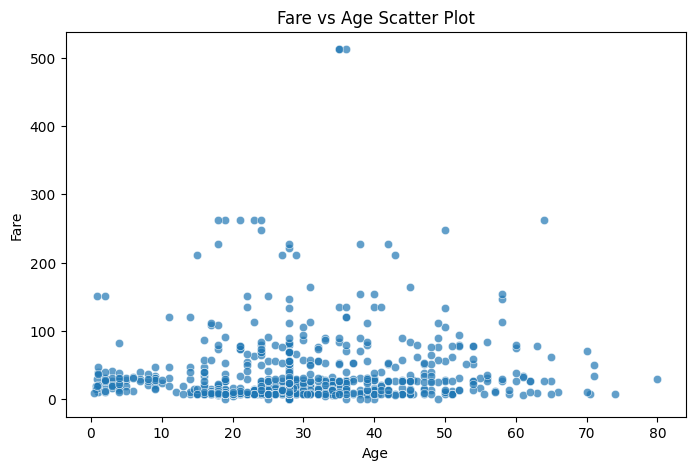

In [59]:
#8.Create a scatter plot to visualize the relationship between fare and age.
plt.figure(figsize=(8, 5))
sns.scatterplot(x=titanic['age'], y=titanic['fare'], alpha=0.7)
plt.title("Fare vs Age Scatter Plot")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()